<br><p style="font-family: Arial; font-size:2.5em;color:purple; font-style:bold">
Exploratory Data Analysis <br><br> <u>Uber's Supply Demand dataset for prediction</u></p><br><br>

# Uber's Supply Demand Data
* Uber's data for a specific to airport
* The dataset can be found on the page: https://www.kaggle.com/lihkininos/uber-supply-demand-gap/data

## About the data set:
* Column1: Request ID (Numerical)
* Column2: Pickup point (String)
* Column3: Driver ID (Numerical)
* Column4: Trip Status (String)
* Column5: Request Time (DateTime)
* Column6: Drop Time (DateTime)

## Overall Objective:
* Exploratory analysis of Uber Demand vs Supply on City to Airpot (vice versa) travel

In [1]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pprint import pprint

In [2]:
# Read data from the csv file
case_data = pd.read_csv('Uber Request Data.csv')

case_data.head() # View the data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
# Modify the columns
case_data_columns = case_data.columns
case_data_columns = map(lambda x : "_".join(x.split()), case_data) # Fill the `spaces` with `underscore`
case_data.columns = list(case_data_columns)

case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
# Check for the unique values in `Pickup_point`, `Status`, `Driver_id`
pickup_points = case_data['Pickup_point'].unique()
driver_ids = case_data['Driver_id'].unique()
statuses = case_data['Status'].unique()

print("Unique values for `pickup point` are: ",pickup_points, "and total unique value is: ",len(pickup_points))
print("Unique values for `drivers` are: ",driver_ids[:5], "... and total unique value is: ",len(driver_ids))
print("Unique values for `Status` are: ",statuses, "and total unique value is: ",len(statuses))

Unique values for `pickup point` are:  ['Airport' 'City'] and total unique value is:  2
Unique values for `drivers` are:  [1. 2. 3. 4. 5.] ... and total unique value is:  301
Unique values for `Status` are:  ['Trip Completed' 'Cancelled' 'No Cars Available'] and total unique value is:  3


In [5]:
case_data.loc[(case_data['Status'] == 'Trip Completed') & (case_data['Drop_timestamp'].isnull())]

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp


In [6]:
# Checking for the columns having `NaN` values
case_data_columns = case_data.columns
for col in case_data_columns:
    if any(case_data[col].isnull()):
        print(col)

Driver_id
Drop_timestamp


In [7]:
# Handling the `NaN` values
values = {'Driver_id': 999, 'Drop_timestamp': '01/01/2000 00:00'}
case_data.fillna(values, inplace=True)

In [8]:
# Changing timestamp column
case_data['Drop_timestamp'] = pd.to_datetime(case_data['Drop_timestamp'])
case_data['Request_timestamp'] = pd.to_datetime(case_data['Request_timestamp'])

In [9]:
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            6745 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       6745 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [10]:
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [11]:
# We require only `Request_timestamp` data so extracting different date time attributes
# Check for the `max` & `min` request timestamp
print('Max Request date time: ', case_data['Request_timestamp'].max())
print('Min Request date time: ', case_data['Request_timestamp'].min())

Max Request date time:  2016-12-07 23:54:00
Min Request date time:  2016-07-13 00:00:24


In [12]:
# Extract the date time attribute
case_data['Request_date'] = case_data['Request_timestamp'].dt.date
case_data['Request_hour'] = case_data['Request_timestamp'].dt.hour
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8


In [13]:
# Driver status as per maximum or minimum cancelled or Trip completed status
driver_status = case_data.groupby(['Driver_id', 'Status']).count()
driver_status = driver_status.reset_index()
driver_status = driver_status[['Driver_id', 'Status', 'Request_id']]
driver_status = driver_status.pivot(index='Driver_id', columns='Status', values='Request_id')

most_cancelled_drivers = driver_status.sort_values(['Cancelled'], ascending=False)
most_completed_drivers = driver_status.sort_values(['Trip Completed'], ascending=False)
top_5_cancelled_drivers = most_cancelled_drivers.head(5)
top_5_completed_drivers = most_completed_drivers.head(5)
del most_cancelled_drivers
del most_completed_drivers
print(top_5_cancelled_drivers)
print(top_5_completed_drivers)

Status     Cancelled  No Cars Available  Trip Completed
Driver_id                                              
84.0            12.0                NaN             9.0
54.0            11.0                NaN             8.0
206.0           10.0                NaN             7.0
142.0           10.0                NaN            10.0
267.0            9.0                NaN             6.0
Status     Cancelled  No Cars Available  Trip Completed
Driver_id                                              
22.0             5.0                NaN            16.0
233.0            3.0                NaN            15.0
184.0            2.0                NaN            15.0
126.0            4.0                NaN            14.0
107.0            5.0                NaN            14.0


In [14]:
# Plotting Friendly allignments
top_5_cancelled_drivers = top_5_cancelled_drivers.unstack().reset_index().sort_values(['Driver_id', 'Status'])
top_5_cancelled_drivers = top_5_cancelled_drivers.rename(columns={0:'Counts'})
top_5_cancelled_drivers = top_5_cancelled_drivers[['Driver_id', 'Status', 'Counts']]
top_5_cancelled_drivers = top_5_cancelled_drivers[top_5_cancelled_drivers['Status'] != 'No Cars Available']

top_5_completed_drivers = top_5_completed_drivers.unstack().reset_index().sort_values(['Driver_id', 'Status'])
top_5_completed_drivers = top_5_completed_drivers.rename(columns={0:'Counts'})
top_5_completed_drivers = top_5_completed_drivers[['Driver_id', 'Status', 'Counts']]
top_5_completed_drivers = top_5_completed_drivers[top_5_completed_drivers['Status'] != 'No Cars Available']

print(top_5_cancelled_drivers.head(3))
print(top_5_completed_drivers.head(3))

    Driver_id          Status  Counts
1        54.0       Cancelled    11.0
11       54.0  Trip Completed     8.0
0        84.0       Cancelled    12.0
    Driver_id          Status  Counts
0        22.0       Cancelled     5.0
10       22.0  Trip Completed    16.0
4       107.0       Cancelled     5.0


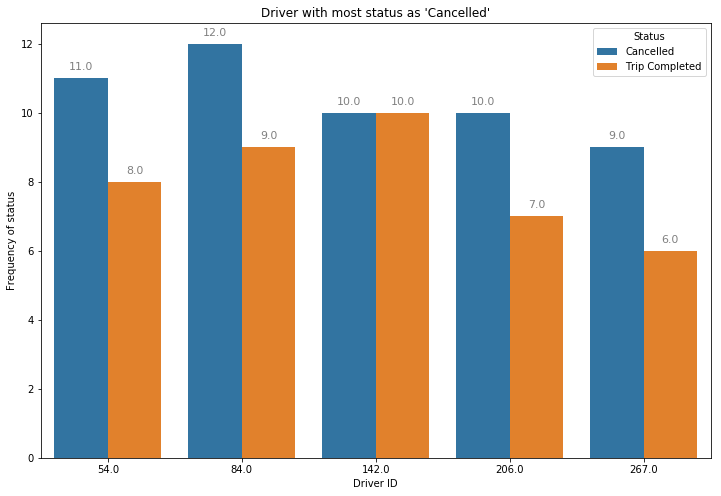

In [15]:
# Plotting the Status for top 5 drivers having status as 'Canclled'
plt.figure(figsize=(12,8))
cancel_plot = sns.barplot(data=top_5_cancelled_drivers, x='Driver_id',y='Counts',hue='Status')
cancel_plot.set_xlabel('Driver ID')
cancel_plot.set_ylabel('Frequency of status')
cancel_plot.set_title('Driver with most status as \'Cancelled\'')
cancel_ax = cancel_plot.axes
for p in cancel_ax.patches:
    cancel_ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', fontsize=11, color='gray', rotation=0, xytext=(0, 8),
                 textcoords='offset points')

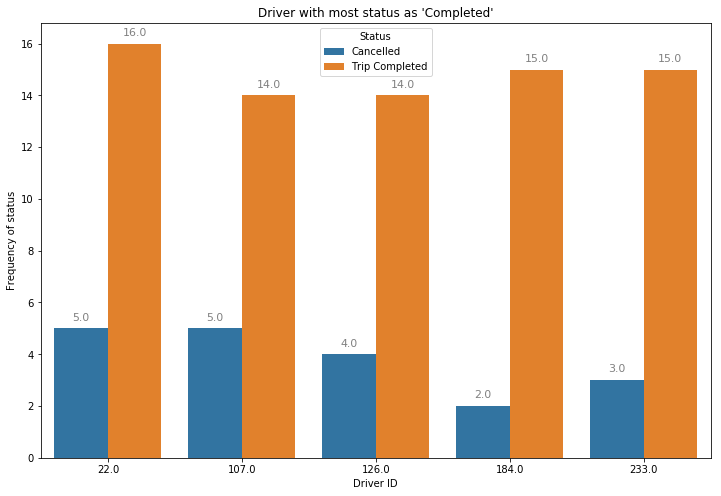

In [16]:
# Plotting the Status for top 5 drivers having status as 'Trip Completed'
plt.figure(figsize=(12,8))
completed_plot = sns.barplot(data=top_5_completed_drivers, x='Driver_id',y='Counts',hue='Status')
completed_plot.set_xlabel('Driver ID')
completed_plot.set_ylabel('Frequency of status')
completed_plot.set_title('Driver with most status as \'Completed\'')
completed_ax = completed_plot.axes
for p in completed_ax.patches:
    completed_ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', fontsize=11, color='gray', rotation=0, xytext=(0, 8),
                 textcoords='offset points')

### Key Point Observations:
* We extracted top 5 drivers having `cancelled` status maximum
* We extracted top 5 drivers having `Trip Completed` status maximum

In [17]:
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8


In [18]:
def get_timepart(x):
    if x >= 5 and x <= 8:
        return 'Moring Hours'
    elif x > 8 and x <= 12:
        return 'Before Noon'
    elif x > 12 and x <= 17:
        return 'Afternoon'
    elif x > 17 and x <= 21:
        return 'Afternoon Rush'
    elif x > 21 and x <= 23:
        return 'Before Midnight'
    else:
        return 'Night Drive'

### Data wrangling/manipulation
##### We have divided the `Request Hour` into different time parts of a day
* 5 A.M to 8 A.M as `Morning Hours`
* 8 A.M to 12 P.M as `Before Noon`
* 12 P.M to 5 P.M as `Afternoon`
* 5 P.M to 9 P.M as `Afternoon Rush`
* 9 P.M to 11 P.M as `Before Midnight`
* 11 P.M to 5 A.M as `Night Drive`

In [19]:
def split_into_timepart(ip_dataframe, hour_24):
    ip_dataframe['timepart'] = ip_dataframe[hour_24].map(get_timepart)
    return ip_dataframe

In [20]:
case_data = split_into_timepart(case_data, 'Request_hour')
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,timepart
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,Before Noon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,Before Noon
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,Afternoon Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Moring Hours


In [21]:
# Extracting demand counts at different period of time in a day
timepart_count = case_data['timepart'].value_counts().to_frame('Count').reset_index()

Text(0.5,1,'Rides in different period of a day')

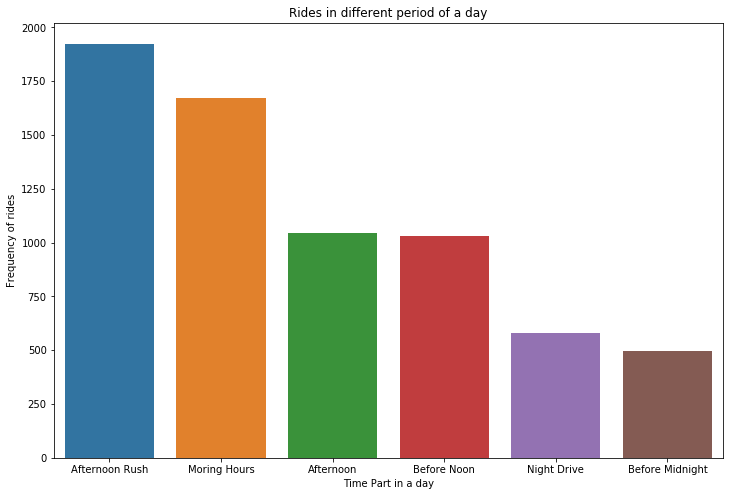

In [22]:
# Plotting the above data
plt.figure(figsize=(12,8))
timepart_plot = sns.barplot(data=timepart_count, x='index', y='Count');
timepart_plot.set_xlabel('Time Part in a day')
timepart_plot.set_ylabel('Frequency of rides')
timepart_plot.set_title('Rides in different period of a day')
# timepart_plot = completed_plot.axes


### Key point observations:
* `Morning Hours` & `Afternoon Rush` are main two time periods of a day where the Uber demand is maximum

In [23]:
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,timepart
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,Before Noon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,Before Noon
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,Afternoon Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Moring Hours


In [24]:
# Extracting the data of uber demand based on the pickup point
pickpoint_timepart_count = case_data.groupby(['Pickup_point', 'timepart']).count()
pickpoint_timepart_count.reset_index(inplace=True)
pickpoint_timepart_count = pickpoint_timepart_count[['Pickup_point', 'timepart', 'Request_id']]
pickpoint_timepart_count

,Pickup_point,timepart,Request_id
0,Airport,Afternoon,560
1,Airport,Afternoon Rush,1492
2,Airport,Before Midnight,281
3,Airport,Before Noon,315
4,Airport,Moring Hours,337
5,Airport,Night Drive,253
6,City,Afternoon,484
7,City,Afternoon Rush,432
8,City,Before Midnight,217
9,City,Before Noon,714


Text(0.5,1,'Rides in different period of a day based on pickup point')

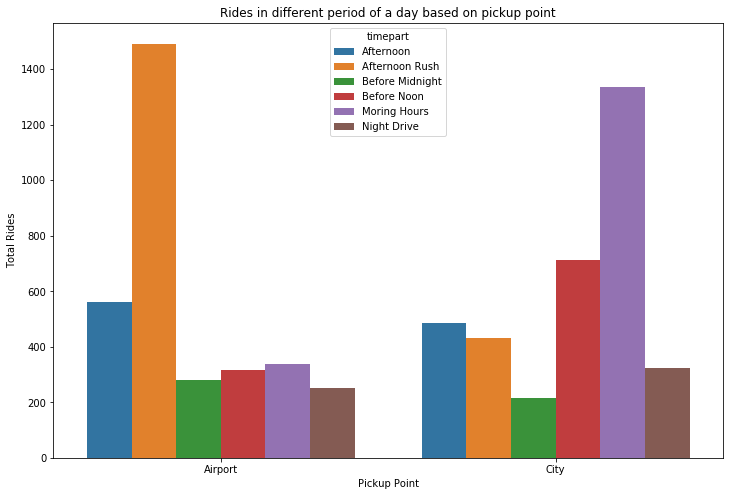

In [25]:
# Plotting uber demand based on the pickup point
plt.figure(figsize=(12,8))
timepart_pickpoint_plot = sns.barplot(data=pickpoint_timepart_count, x='Pickup_point', y='Request_id', hue='timepart')
timepart_pickpoint_plot.set_xlabel('Pickup Point')
timepart_pickpoint_plot.set_ylabel('Total Rides')
timepart_pickpoint_plot.set_title('Rides in different period of a day based on pickup point')
# timepart_pickpoint_plot = completed_plot.axes


### Key point observations:
* From `Airport` at the time period `Afternoon Rush` the demand is maximum
* From `City` at the time period `Morning Hours` the demand is maximum

### Possible conclusions:
* Maximum of the flignts departs from the `City` on `Morning Hours` time period
* Maximum of the flights arrives at the `Airport` on `Afternoon Rush` time period
* Probably the cheapest flights departs from the `City` at morning and arrives at `Afternoon`

In [26]:
case_data.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_hour,timepart
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11,Before Noon
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,9,Before Noon
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21,Afternoon Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Moring Hours


### Analysis on the `Demand` , `Supply` & `Gap` of Uber

In [27]:
#Extracting the driver status on each hour
demand_supply_data = case_data.groupby(['Request_hour','Status']).count()['Request_id'].to_frame().reset_index().\
            pivot(index='Request_hour', columns='Status', values='Request_id')
demand_supply_data.head()

Status,Cancelled,No Cars Available,Trip Completed
Request_hour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78


In [28]:
# Populating the `Supply`, `Demand` & `Gap` data
demand_supply_data['Demand'] = demand_supply_data['Cancelled'] + demand_supply_data['No Cars Available'] + demand_supply_data['Trip Completed']
demand_supply_data['Supply'] = demand_supply_data['Trip Completed']
demand_supply_data['Gap'] = demand_supply_data['Demand'] - demand_supply_data['Trip Completed']
demand_supply_data.head()

Status,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
Request_hour,,,,,,
0,3,56,40,99,40,59
1,4,56,25,85,25,60
2,5,57,37,99,37,62
3,2,56,34,92,34,58
4,51,74,78,203,78,125


Text(0.5,1,'Total Demand vs Supply in a day')

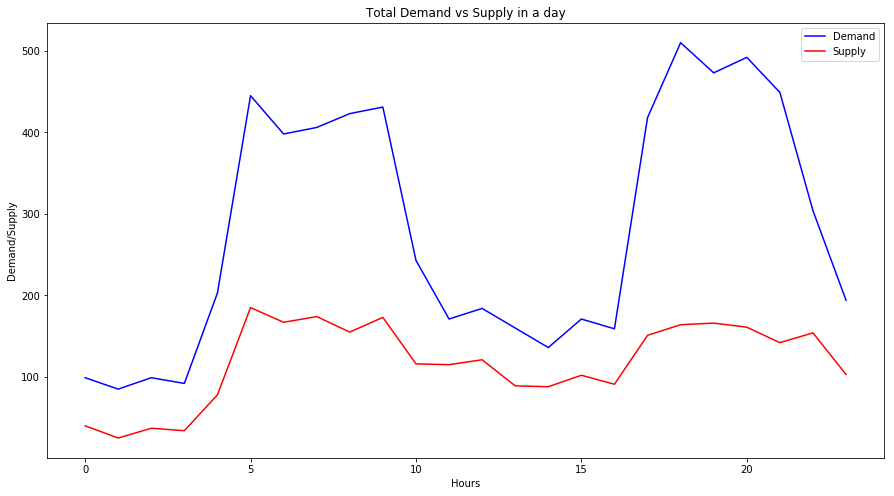

In [29]:
# Plotting the `Supply`, `Demand` & `Gap` data
plt.figure(figsize=(15,8))
demand_plot = sns.lineplot(x=demand_supply_data.index, y=demand_supply_data.Demand, color='b', label='Demand')
supply_plot = sns.lineplot(x=demand_supply_data.index, y=demand_supply_data.Supply, color='r', label='Supply')
demand_plot.set_xlabel('Hours')
demand_plot.set_ylabel('Demand/Supply')
demand_plot.set_title('Total Demand vs Supply in a day')


### Observations:
* From the graph it is very clear that Uber doesn't meet the `Supply` for the `Demand` on cabs

In [30]:
#Extracting the driver status on each hour when picked up from Airport
airport_case_data = case_data[case_data['Pickup_point'] == 'Airport']
demand_supply_data_airport = airport_case_data.groupby(['Request_hour','Status']).count()['Request_id'].to_frame().reset_index().\
            pivot(index='Request_hour', columns='Status', values='Request_id').\
            fillna(0)
demand_supply_data_airport.head()

Status,Cancelled,No Cars Available,Trip Completed
Request_hour,,,
0,0.0,30.0,23.0
1,0.0,29.0,13.0
2,0.0,25.0,16.0
3,0.0,30.0,15.0
4,2.0,34.0,36.0


In [31]:
# Populating the `Supply`, `Demand` & `Gap` data when from `Airport`
demand_supply_data_airport['Demand'] = demand_supply_data_airport['Cancelled'] + demand_supply_data_airport['No Cars Available'] + demand_supply_data_airport['Trip Completed']
demand_supply_data_airport['Supply'] = demand_supply_data_airport['Trip Completed']
demand_supply_data_airport['Gap'] = demand_supply_data_airport['Demand'] - demand_supply_data_airport['Trip Completed']
demand_supply_data_airport.head()

Status,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
Request_hour,,,,,,
0,0.0,30.0,23.0,53.0,23.0,30.0
1,0.0,29.0,13.0,42.0,13.0,29.0
2,0.0,25.0,16.0,41.0,16.0,25.0
3,0.0,30.0,15.0,45.0,15.0,30.0
4,2.0,34.0,36.0,72.0,36.0,36.0


In [32]:
#Extracting the driver status on each hour when picked up from City
city_case_data = case_data[case_data['Pickup_point'] == 'City']
demand_supply_data_city = city_case_data.groupby(['Request_hour','Status']).count()['Request_id'].to_frame().reset_index().\
            pivot(index='Request_hour', columns='Status', values='Request_id').\
            fillna(0)
demand_supply_data_city.head()

Status,Cancelled,No Cars Available,Trip Completed
Request_hour,,,
0,3,26,17
1,4,27,12
2,5,32,21
3,2,26,19
4,49,40,42


In [33]:
# Populating the `Supply`, `Demand` & `Gap` data when from `City`
demand_supply_data_city['Demand'] = demand_supply_data_city['Cancelled'] + demand_supply_data_city['No Cars Available'] + demand_supply_data_city['Trip Completed']
demand_supply_data_city['Supply'] = demand_supply_data_city['Trip Completed']
demand_supply_data_city['Gap'] = demand_supply_data_city['Demand'] - demand_supply_data_city['Trip Completed']
demand_supply_data_city.head()

Status,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
Request_hour,,,,,,
0,3,26,17,46,17,29
1,4,27,12,43,12,31
2,5,32,21,58,21,37
3,2,26,19,47,19,28
4,49,40,42,131,42,89


Text(0.5,1,'Total Demand vs Supply in a day from Airport')

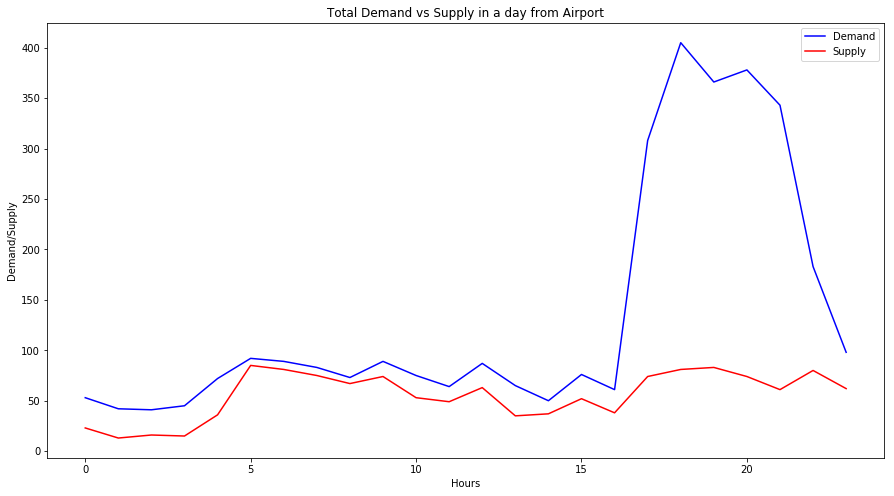

In [34]:
# Plotting the `Supply`, `Demand` & `Gap` data from Airport
plt.figure(figsize=(15,8))
demand_plot = sns.lineplot(x=demand_supply_data_airport.index, y=demand_supply_data_airport.Demand, color='b', label='Demand')
supply_plot = sns.lineplot(x=demand_supply_data_airport.index, y=demand_supply_data_airport.Supply, color='r', label='Supply')
demand_plot.set_xlabel('Hours')
demand_plot.set_ylabel('Demand/Supply')
demand_plot.set_title('Total Demand vs Supply in a day from Airport')

### Observations
* There is a huge `Gap` of `Supply` on Afternoon and Night on Airport
* Rest of the time the `Supply` is fairly similar to the `Demand`

Text(0.5,1,'Total Demand vs Supply in a day from City')

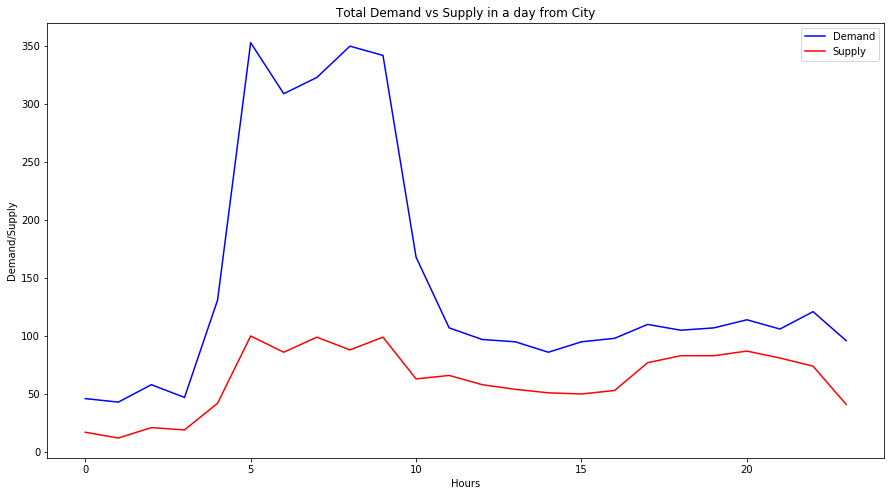

In [35]:
# Plotting the `Supply`, `Demand` & `Gap` data from City
plt.figure(figsize=(15,8))
demand_plot = sns.lineplot(x=demand_supply_data_city.index, y=demand_supply_data_city.Demand, color='b', label='Demand')
supply_plot = sns.lineplot(x=demand_supply_data_city.index, y=demand_supply_data_city.Supply, color='r', label='Supply')
demand_plot.set_xlabel('Hours')
demand_plot.set_ylabel('Demand/Supply')
demand_plot.set_title('Total Demand vs Supply in a day from City')

### Observations
* There is a huge `Gap` of `Supply` on Morning Hours
* Rest of the time the `Supply` is fairly similar to the `Demand`

